In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline


In [40]:
data_window = 50

#non leverage alternating +/- 3%

df = pd.DataFrame(index=range(data_window))

#odd days to +3%
df.loc[ df.index % 2 == 1, 'underlying_return'] = 0.03

#even days to -3%
df.loc[ df.index % 2 == 0, 'underlying_return'] = -0.02913

#cummulative series

df['underlying_price'] = (df['underlying_return'] + 1).cumprod()

#inverse ETFs
df['short_return'] = df[ 'underlying_return' ] * -1
df['double_short_return'] = df[ 'underlying_return' ] * -2

df[ 'short_price' ] = ( df['short_return'] + 1 ).cumprod()
df[ 'double_short_price' ] = ( df['double_short_return'] + 1 ).cumprod()




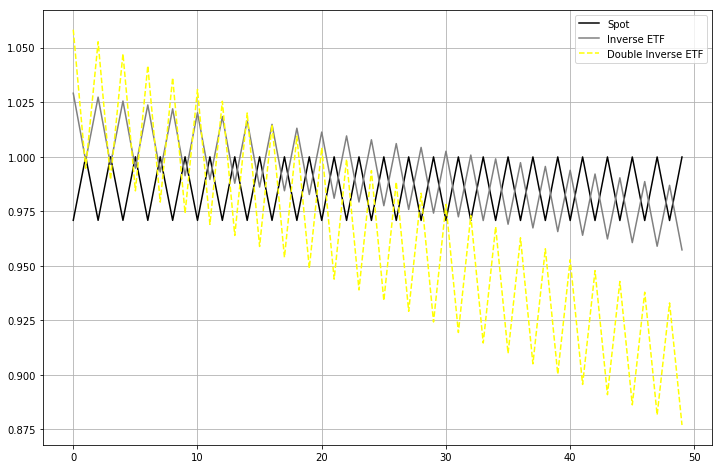

In [42]:
# show graphics
fig = plt.figure( figsize=(12 , 8) )

ax = fig.add_subplot(111)

ax.plot( df['underlying_price'], linestyle = '-', label='Spot', color='black' )

ax.plot( df['short_price'], linestyle='-', label='Inverse ETF', color='grey' )

ax.plot( df['double_short_price'], linestyle='--', label='Double Inverse ETF', color='yellow' )

ax.legend()
ax.grid(True)